In [190]:
import numpy as np
import math

# Simple Neural Network, hagamoslo de cero!

Recuerdo: definimos X como la matriz de entradas (features) e Y como la matriz de salidas esperadas (targets).

In [191]:
X = np.array([
    [0,0,1],
    [1,1,1],
    [1,0,1],
    [0,1,1]
])
y = np.array([[0,1,1,0]]).T # La T es para que sea una matriz columna

Recordemos que la cuenta de una red neuronal simple es:
$$
z = \sum_{i=0}^{n} w_{i} x_i = w_0 x_0 + w_1 x_1 + ... + w_n x_n
$$
A eso le aplicamos una función de activación, en este caso la sigmoide.
Nos quedaría:
$$
output = \sigma(\sum_{i=0}^{n} w_{i} x_i)
$$
o de forma vectorial:
$$
\text{output} = \sigma\!\left(
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix}
\right)
$$

Ahora hagamos esta misma cuenta pero programando :)
Definamos las cosas que nos faltan.

In [192]:
weights =np.random.rand(3,1) # Completar. Debería ser una vector de 3x1 con valores aleatorios. Usar función de numpy
print(weights)
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # Completar con la fórmula de la función sigmoide

[[0.06521498]
 [0.88249711]
 [0.92858578]]


In [193]:
def bin(v):
  return (v > 0.5).astype(int)


Ahora, creamos la función de forward propagation. Fijemonos que pasa cuando la usamos con los pesos random.

In [194]:
def forward_prop(X, weights):
    z = np.dot(X, weights) # Producto punto entre X y los pesos
    output = sigmoid(z)     # Aplicar la función sigmoide
    return output

output = forward_prop(X, weights)
print("Output de la red neuronal con pesos random:")
print(output)

Output de la red neuronal con pesos random:
[[0.71678828]
 [0.86718531]
 [0.72983799]
 [0.8594927 ]]


Claramente no tiene mucho sentido... Intentemos mejorarlo!

Pasos para mejorar la red neuronal:
- Definir una función de pérdida (loss function) para medir qué tan bien lo estamos haciendo.
- Calculo la derivada de la función de pérdida.
Esto es para saber en qué dirección ajustar los pesos (sumo o resto?)
- Repito el proceso varias veces (epochs), ajustando los pesos en cada iteración.

In [195]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [196]:
print("Pesos iniciales:")
print(weights)

error = y - output
print("\n Error inicial:")
print(error)

print("\n Derivada de la función sigmoide aplicada al output:")
print(sigmoid_derivative(output))

ajuste = error * sigmoid_derivative(output)
print("\n Ajuste a aplicar a los pesos:")
print(ajuste)

weights += np.dot(X.T, ajuste)
print("\n Nuevos pesos después del ajuste:")
print(weights)

Pesos iniciales:
[[0.06521498]
 [0.88249711]
 [0.92858578]]

 Error inicial:
[[-0.71678828]
 [ 0.13281469]
 [ 0.27016201]
 [-0.8594927 ]]

 Derivada de la función sigmoide aplicada al output:
[[0.20300284]
 [0.11517495]
 [0.1971745 ]
 [0.120765  ]]

 Ajuste a aplicar a los pesos:
[[-0.14551006]
 [ 0.01529692]
 [ 0.05326906]
 [-0.10379663]]

 Nuevos pesos después del ajuste:
[[0.13378096]
 [0.7939974 ]
 [0.74784507]]


**Consigna:** Hacer este mismo proceso de entrenamiento varias veces (si, es copiar y pegar el codigo de arriba en un for). Cuantas? El número de epochs.

También guardarse los errores en una lista y graficarlas al final para ver como va mejorando la red neuronal!
Recomendación: promediar los errores y tomarles valor absoluto para que no se cancelen entre sí. Esto es solo para graficar mejor


In [197]:
epochs = 50000
errores = []

for epoch in range(epochs):
  output = forward_prop(X, weights)
  error = y - output
  ajuste = error * sigmoid_derivative(output)
  weights += np.dot(X.T, ajuste)

Veamos cómo quedaron los pesos finales

Consigna: Escriban por que les parece que puede tener sentido que esos sean los pesos finales. (Miren el input y el output original)

In [198]:
print("Pesos finales después del entrenamiento:")
print(weights)

Pesos finales después del entrenamiento:
[[11.309189  ]
 [-0.20516902]
 [-5.44993435]]


Les dejo un código para graficar la red neuronal con los pesos finales.

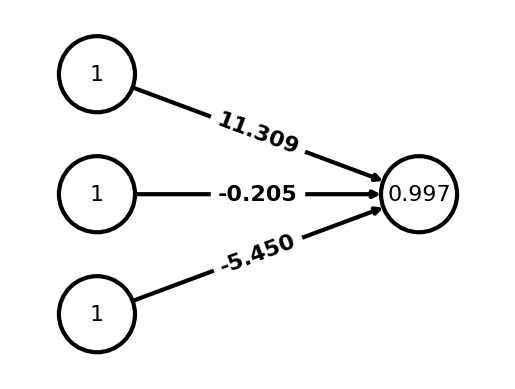

In [199]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools
G = nx.DiGraph()
layers = [[0, 1, 2], [3]]

rels = list(itertools.product(*layers))
#rels.append((3, 4))
flatten = lambda l: [x for i in l for x in i]

labels = {i: v for i, v in enumerate(X[1])}
labels[3] = round(forward_prop(X[1], weights)[0], 3)
#labels[4] = 0 if res < thresh else 1

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
  for j, v in enumerate(l):
    pos[v] = (i, len(l) - j)

pos[3] = (pos[3][0], pos[1][1])
#pos[4] = (pos[3][0] + 1, pos[1][1])

weights_labels = {(ra, rb): "{:0.3f}".format(weights[i][0]) for i, (ra, rb) in enumerate(rels)}
G.add_edges_from(rels)

options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": [(1, 1, 1, 1) for _ in range(len(labels))],
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16,
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()

**Última consigna**: Prueben algunos ejemplos nuevos, que no estén en el dataset original, y vean qué predice la red neuronal

In [200]:
X_test = np.array([
    [1,0,0],
    [1,1,1],
    [0,0,1],
    [1,1,1]
])

y_predicted=bin(forward_prop(X_test, weights))

In [201]:
print(y_predicted)

[[1]
 [1]
 [0]
 [1]]
